In [2]:
from mmdet.apis import init_detector, inference_detector, show_result_pyplot
import mmcv
import copy
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd
from lvis import LVIS

In [3]:
config_file = './configs/custom/faster_rcnn_r50_fpn_1x_lvis.py'
checkpoint_file = './checkpoints/trained/baseline_epoch_12.pth'
# model = init_detector(config_file, checkpoint_file, device='cuda:0')
model = init_detector(config_file, checkpoint_file, device='cpu')
init_weights = copy.deepcopy(model.roi_head.bbox_head.fc_cls.weight.data.cpu().numpy())
cls_weights_baseline = np.sqrt(np.sum((init_weights)**2, axis = 1))

In [5]:
config_file = './configs/custom/gs_faster_rcnn_r50_fpn_1x_lvis_with0_bg8.py'
checkpoint_file = 'work_dirs/gs_faster_rcnn_r50_fpn_1x_lvis_with0_bg8/latest.pth'
# model = init_detector(config_file, checkpoint_file, device='cuda:0')
model = init_detector(config_file, checkpoint_file, device='cpu')
init_weights = copy.deepcopy(model.roi_head.bbox_head.fc_cls.weight.data.cpu().numpy())
cls_weights_bags = np.sqrt(np.sum((init_weights)**2, axis = 1))

In [7]:
train_ann_file = './data/lvis_v1/annotations/lvis_v1_train.json'
lvis_train = LVIS(train_ann_file)
train_catsinfo = lvis_train.cats

In [14]:
cat_info = {}
for cid, cate in train_catsinfo.items():
    cat_info[cid]={}
    cat_info[cid]['id'] = cid
    cat_info[cid]['name'] = cate['name']
    cat_info[cid]['instance_count'] = int(cate['instance_count'])
    cat_info[cid]['cls_weight_baseline'] = cls_weights_baseline[cid-1]
    cat_info[cid]['cls_weight_bags'] = cls_weights_bags[cid-1]    

In [26]:
df = pd.DataFrame.from_dict(cat_info, orient='index')
df.sort_values(by='instance_count', inplace=True, ascending=False)
df.reset_index(drop = True, inplace=True)
df['cls_weight_baseline']=df['cls_weight_baseline'].rolling(3).mean()
df['cls_weight_bags']=df['cls_weight_bags'].rolling(3).mean()
df.head()


,id,name,instance_count,cls_weight_baseline,cls_weight_bags
0,45,banana,50552,NaN,NaN
1,127,book,33353,NaN,NaN
2,217,carrot,18049,1.228384,0.283414
3,12,apple,17451,1.146763,0.279800
4,827,pole,14276,1.059212,0.287954


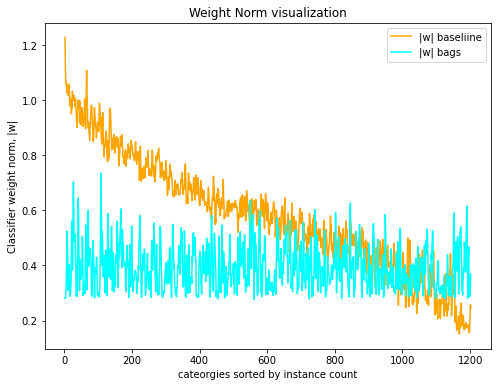

In [27]:
df.plot(y=['cls_weight_baseline','cls_weight_bags'], title ="Weight Norm visualization",
        ylabel="Classifier weight norm, |w|", xlabel = "cateorgies sorted by instance count",
        color=['orange', 'cyan'], label=["|w| baseliine", "|w| bags"], figsize=(8,6))
plt.savefig("figures/wt_norm_visual.png")

In [20]:
# plt.plot(sorted(list(cls_weights))[::-1]);

NameError: name 'cls_weights' is not defined

In [21]:
print(cate.keys())

dict_keys(['name', 'instance_count', 'def', 'synonyms', 'image_count', 'id', 'frequency', 'synset'])
